In [112]:
import numpy as np
import pandas as pd

In [113]:
#to load in the npy file as a numpy array
data_broccoli = np.load('../raw_data/broccoli.npy')

#checking shape of data
data_broccoli.shape

(132826, 784)

In [114]:
#making list of filenames to load locally

filenames = ["alarmclock.npy", "bicycle.npy", "boomerang.npy", "bread.npy", "broccoli.npy", "full_numpy_bitmap_banana.npy", "full_numpy_bitmap_baseball.npy","full_numpy_bitmap_basketball.npy","full_numpy_bitmap_birthday cake.npy","full_numpy_bitmap_bracelet.npy","full_numpy_bitmap_cookie.npy","full_numpy_bitmap_hat.npy","full_numpy_bitmap_lollipop.npy","full_numpy_bitmap_moon.npy","full_numpy_bitmap_pizza.npy","full_numpy_bitmap_spoon.npy","full_numpy_bitmap_sun.npy","full_numpy_bitmap_umbrella.npy","full_numpy_bitmap_wheel.npy", "lantern.npy", "lightning.npy", "streetlight.npy", "tennis racquet.npy", "tractor.npy"]

In [ ]:
#label names in list 

url = 'https://raw.githubusercontent.com/googlecreativelab/quickdraw-dataset/master/categories.txt'
data = urlopen(url)
labels = [line.decode("utf-8").strip() for line in data]

In [115]:
str = "full_numpy_bitmap_banana.npy"
str.replace("full_numpy_bitmap_", "")

'banana.npy'

In [116]:
class_name = os.path.splitext(filenames[0])[0]
class_name

'alarmclock'

In [117]:
import os

#creating X, y and index to use for the loop and a label_names for making a list to check the y-label
X = np.empty([0, 784])
y = np.empty([0])
index = 0
label_names = []

#setting a max per class to retrieve from npy file, we taking 5000 subjects per label for training
max_items_per_class = 20000

#loading data from the npy files. taking 5000 per label and creating a (y)target using the index starting from 1.

for fname in filenames:
    label_name = fname
    label_name = os.path.splitext(label_name)[0]
    label_name = label_name.replace("full_numpy_bitmap_", "")
    label_names.append(label_name) if label_name not in label_names else label_names
    data = np.load('../raw_data/' + fname)
    data = data[0: max_items_per_class, :]
    label = np.full(data.shape[0], index)
    y = np.append(y, label)
    X = np.concatenate((X, data), axis=0)
    index += 1

alarmclock
bicycle
boomerang
bread
broccoli
banana
baseball
basketball
birthday cake
bracelet
cookie
hat
lollipop
moon
pizza
spoon
sun
umbrella
wheel
lantern
lightning
streetlight
tennis racquet
tractor


In [118]:
#printing label names 
label_names

['alarmclock',
 'bicycle',
 'boomerang',
 'bread',
 'broccoli',
 'banana',
 'baseball',
 'basketball',
 'birthday cake',
 'bracelet',
 'cookie',
 'hat',
 'lollipop',
 'moon',
 'pizza',
 'spoon',
 'sun',
 'umbrella',
 'wheel',
 'lantern',
 'lightning',
 'streetlight',
 'tennis racquet',
 'tractor']

In [119]:
#checking shape of the X after looping the filenames
X.shape

(480000, 784)

In [120]:
#reshaping to (28,28)

X = X.reshape(len(X),28,28)
X.shape

(480000, 28, 28)

In [121]:
import numpy as np
from sklearn.model_selection import train_test_split

In [122]:
#making test and training set with train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

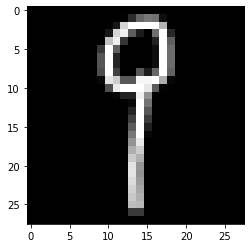

In [125]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
plt.imshow(X_train[23], cmap='gray') 

In [126]:
# Keras needs images whose last dimension is the number of channels, its 1 for black and white.
from tensorflow.keras.backend import expand_dims

X_train = expand_dims(X_train, axis=-1)
X_test = expand_dims(X_test, axis=-1)

print(X_train.shape)
print(X_test.shape)

(384000, 28, 28, 1)
(96000, 28, 28, 1)


In [127]:
#normalize the data by dividing it by 255 

X_train /= 255 
X_test /= 255

In [128]:
num_labels = len(label_names)

In [129]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_labels)
y_test_cat = to_categorical(y_test, num_labels)

In [130]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [131]:
def initialize_model():
    model = models.Sequential()
    model.add(layers.Convolution2D(16, (3, 3),
                            padding='same',
                            input_shape=X_train.shape[1:], activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
    model.add(layers.MaxPooling2D(pool_size =(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_labels, activation='softmax')) 
    # Train model
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['top_k_categorical_accuracy'])
    return model

In [132]:
model = initialize_model()

In [133]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)              

In [134]:
model = initialize_model()

model.fit(X_train, y_train_cat,
          batch_size = 128,
          epochs=5,
          validation_split=0.3,
          verbose=1)

Epoch 1/5
2100/2100 [==============================] - 224s 106ms/step - loss: 1.2452 - top_k_categorical_accuracy: 0.8775 - val_loss: 0.6365 - val_top_k_categorical_accuracy: 0.9589
Epoch 2/5
2100/2100 [==============================] - 250s 119ms/step - loss: 0.5907 - top_k_categorical_accuracy: 0.9623 - val_loss: 0.5541 - val_top_k_categorical_accuracy: 0.9655
Epoch 3/5
2100/2100 [==============================] - 246s 117ms/step - loss: 0.5091 - top_k_categorical_accuracy: 0.9689 - val_loss: 0.5172 - val_top_k_categorical_accuracy: 0.9680
Epoch 4/5
2100/2100 [==============================] - 284s 135ms/step - loss: 0.4640 - top_k_categorical_accuracy: 0.9728 - val_loss: 0.4954 - val_top_k_categorical_accuracy: 0.9699
Epoch 5/5
2100/2100 [==============================] - 268s 127ms/step - loss: 0.4356 - top_k_categorical_accuracy: 0.9749 - val_loss: 0.4814 - val_top_k_categorical_accuracy: 0.9709


In [135]:
score = model.evaluate(X_test, y_test_cat, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 97.18%


In [180]:
y_pred = model.predict(X_pred)

In [172]:
import joblib
model.save('model.save')


INFO:tensorflow:Assets written to: model.save/assets


In [173]:
from tensorflow.keras.models import load_model

In [175]:
model2 = load_model('model.save')

In [185]:
model3 = load_model('model.save')